# Introducción, objetivos y contenido

Este trabajo corresponde a la fase de EDA (Exploratory data analysis). El objetivo de esta fase es obtener una comprensión del contenido de los datasets limpios, así como investigar las relaciones entre variables.

Contenidos:
* Importación de librerías
* Carga de datos
* Análisis de mercado
* Análisis de precios
* Análisis de usuario
* Análisis de correlaciones

# Importación de librerías

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats as st
import json
import gzip
import ast
from pandas import json_normalize
from textblob import TextBlob
import re

# Carga de datos

In [17]:
df_games = pd.read_csv('df_games.csv')
df_reviews = pd.read_csv('df_reviews.csv')
df_usage = pd.read_csv('df_usage.csv')

In [18]:
df_games.sample(2)

,item_id,app_name,genres,year,price,developer
812,203210,Titan Attacks!,Action,2012,9.99,Puppygames
19750,462610,Celestian Tales: Old North - Howl of the Ravager,Indie,2016,4.99,Ekuator Games


In [19]:
df_usage.sample(2)

,item_id,user_id,playtime_forever
1270223,218620.0,76561198037278513,339.0
410540,340.0,Lyricc,0.0


In [20]:
# Creación de dataset para EDA
df_usagebyitem = df_usage.groupby('item_id')['playtime_forever'].sum().reset_index()
df_eda = pd.merge(df_usagebyitem, df_games, on="item_id", how="inner")
df_eda.sample(5)

,item_id,playtime_forever,app_name,genres,year,price,developer
855,41500.0,1750467.0,Torchlight,RPG,2009,14.99,Runic Games
1634,221810.0,104440.0,The Cave,Adventure,2013,14.99,Double Fine Productions
1887,238050.0,8809.0,The Apogee Throwback Pack,Action,2013,9.99,Interceptor Entertainment
6137,387890.0,3.0,Radial Impact,Casual,2015,0.99,Devin Sherry
1171,97000.0,298246.0,Solar 2,Indie,2011,9.99,Murudai


# Análisis de mercado

In [21]:
df_eda.describe()

,item_id,playtime_forever,year,price
count,8627.000000,8.627000e+03,8627.000000,7970.00000
mean,306190.376956,4.965869e+05,2013.031761,10.44269
std,134433.450889,1.029029e+07,4.390662,13.34006
min,10.000000,0.000000e+00,1983.000000,0.49000
25%,252200.000000,5.130000e+02,2012.000000,4.99000
50%,334620.000000,4.737000e+03,2015.000000,7.99000
75%,399080.000000,2.442350e+04,2016.000000,12.99000
max,530720.000000,7.758163e+08,2018.000000,771.71000


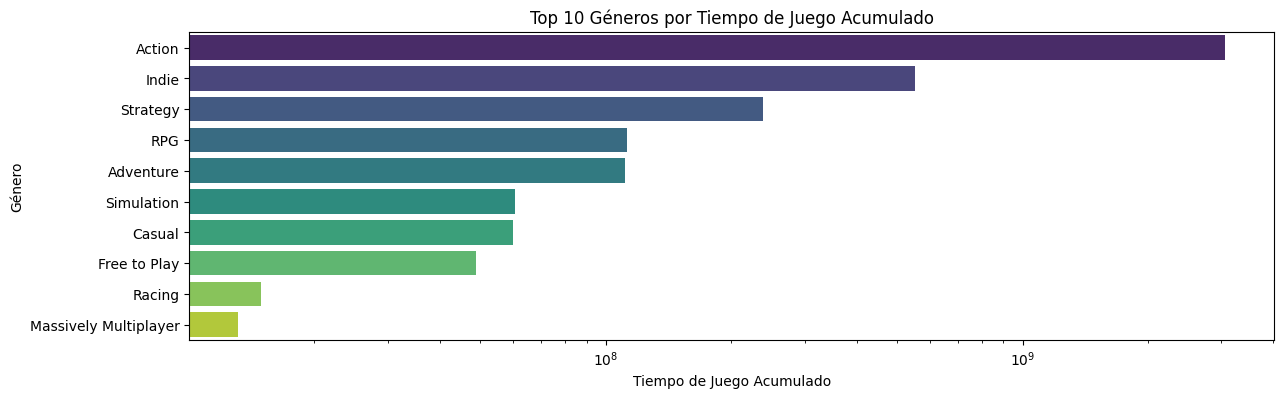

In [22]:
genres_topten = df_eda.groupby('genres')['playtime_forever'].sum().reset_index().sort_values(by='playtime_forever', ascending=False).head(10)

plt.figure(figsize=(14, 4))
sns.barplot(x='playtime_forever', y='genres', data=genres_topten, hue='genres', palette='viridis')
plt.xscale('log')
plt.xlabel('Tiempo de Juego Acumulado')
plt.ylabel('Género')
plt.title('Top 10 Géneros por Tiempo de Juego Acumulado')
plt.show()

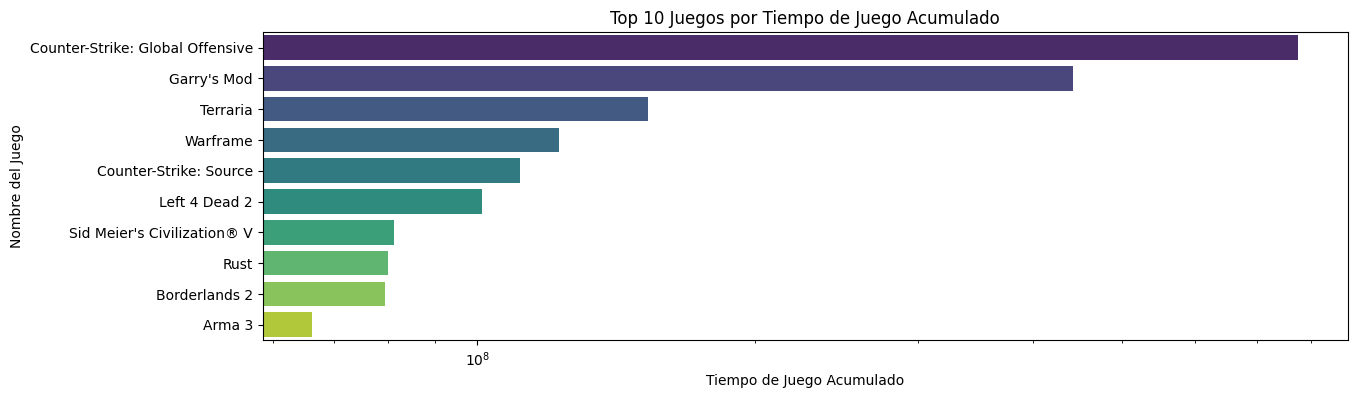

In [23]:
appname_topten = df_eda.groupby('app_name')['playtime_forever'].sum().reset_index().sort_values(by='playtime_forever', ascending=False).head(10)

plt.figure(figsize=(14, 4))
sns.barplot(x='playtime_forever', y='app_name', data=appname_topten, hue='app_name', palette='viridis')
plt.xscale('log')
plt.xlabel('Tiempo de Juego Acumulado')
plt.ylabel('Nombre del Juego')
plt.title('Top 10 Juegos por Tiempo de Juego Acumulado')
plt.show()

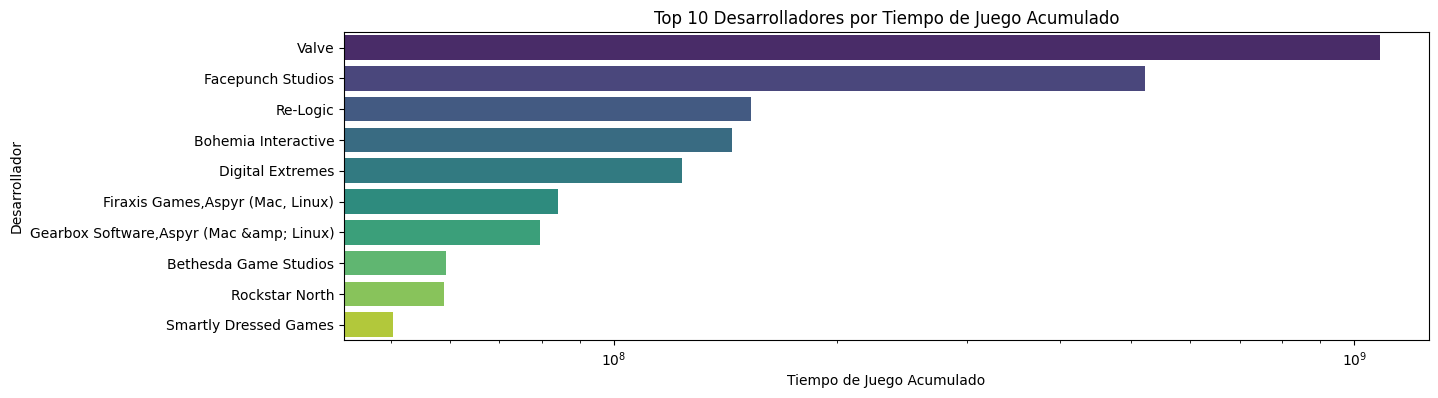

In [24]:
developer_topten = df_eda.groupby('developer')['playtime_forever'].sum().reset_index().sort_values(by='playtime_forever', ascending=False).head(10)

plt.figure(figsize=(14, 4))
sns.barplot(x='playtime_forever', y='developer', data=developer_topten, hue='developer', palette='viridis')
plt.xscale('log')
plt.xlabel('Tiempo de Juego Acumulado')
plt.ylabel('Desarrollador')
plt.title('Top 10 Desarrolladores por Tiempo de Juego Acumulado')
plt.show()

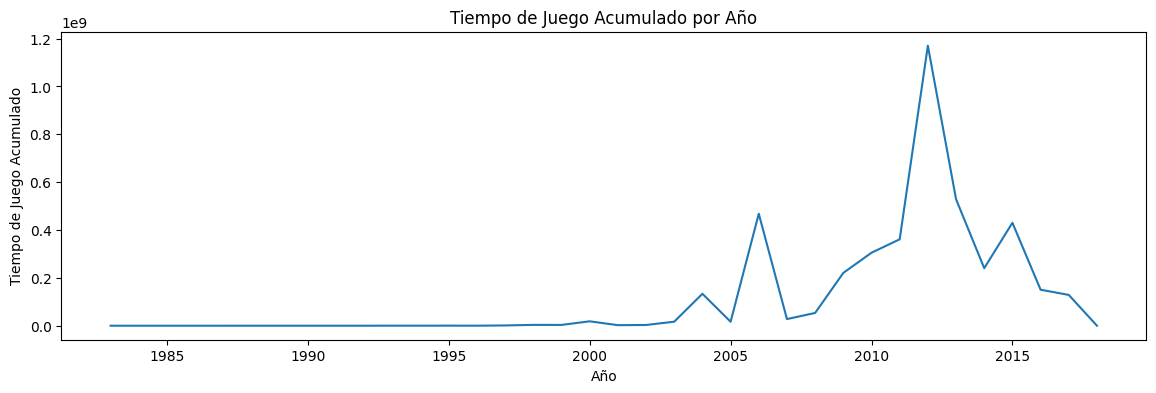

In [25]:
plt.figure(figsize=(14, 4))
sns.lineplot(x='year', y='playtime_forever', data=df_eda, estimator=sum, errorbar=None)

plt.xlabel('Año')
plt.ylabel('Tiempo de Juego Acumulado')
plt.title('Tiempo de Juego Acumulado por Año')
plt.show()

# Análisis de precios

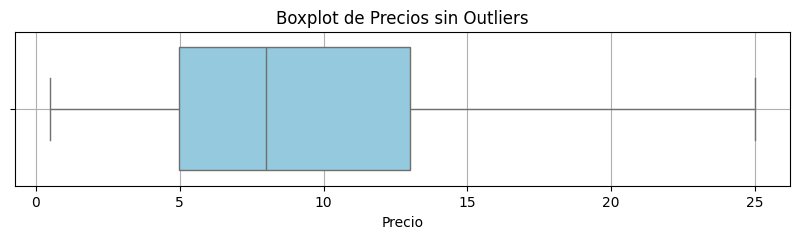

In [26]:
plt.figure(figsize=(10,2))
sns.boxplot(x='price', data=df_eda, color='skyblue', showfliers=False)

plt.xlabel('Precio')
plt.title('Boxplot de Precios sin Outliers')
plt.grid(True)
plt.show()


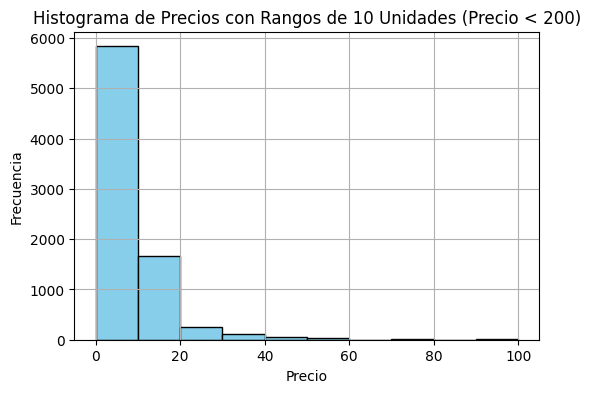

In [27]:
precios_filtrados = df_eda[df_eda['price'] < 100]['price']

rango_precios = np.arange(0, precios_filtrados.max() + 10, 10)

plt.figure(figsize=(6, 4))
plt.hist(df_eda[df_eda['price'] < 100]['price'], bins=rango_precios, color='skyblue', edgecolor='black')

plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios con Rangos de 10 Unidades (Precio < 200)')

plt.grid(True)
plt.show()


# Análisis de usuario

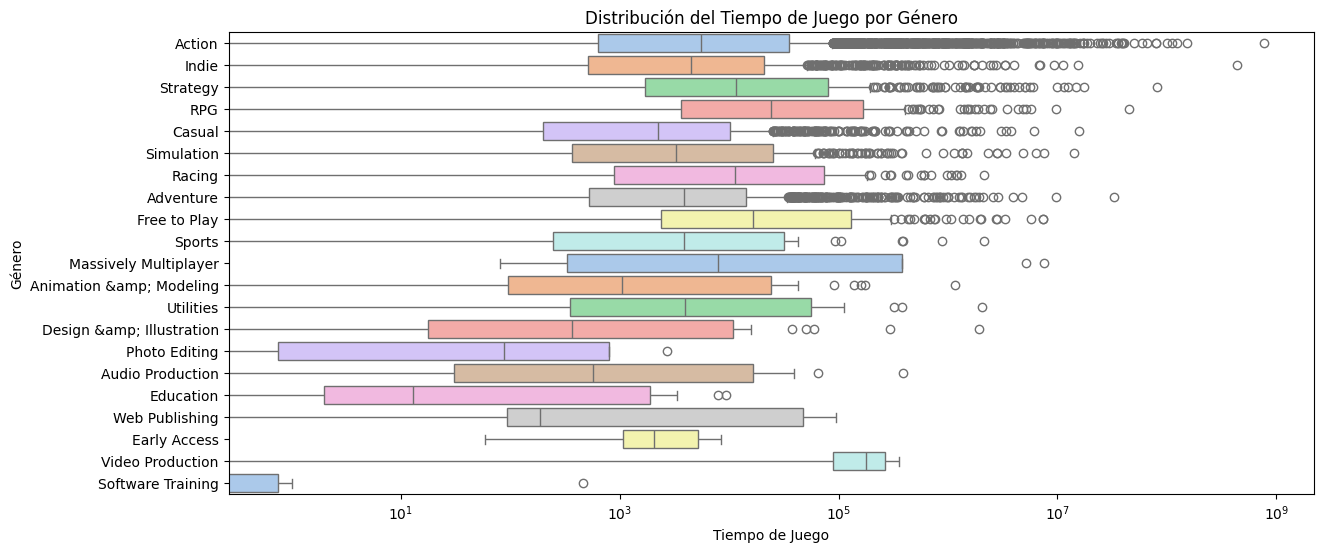

In [28]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='playtime_forever', y='genres', data=df_eda, orient='h',  hue='genres', palette='pastel')

plt.xscale('log')
plt.xlabel('Tiempo de Juego')
plt.ylabel('Género')
plt.title('Distribución del Tiempo de Juego por Género')
plt.show()


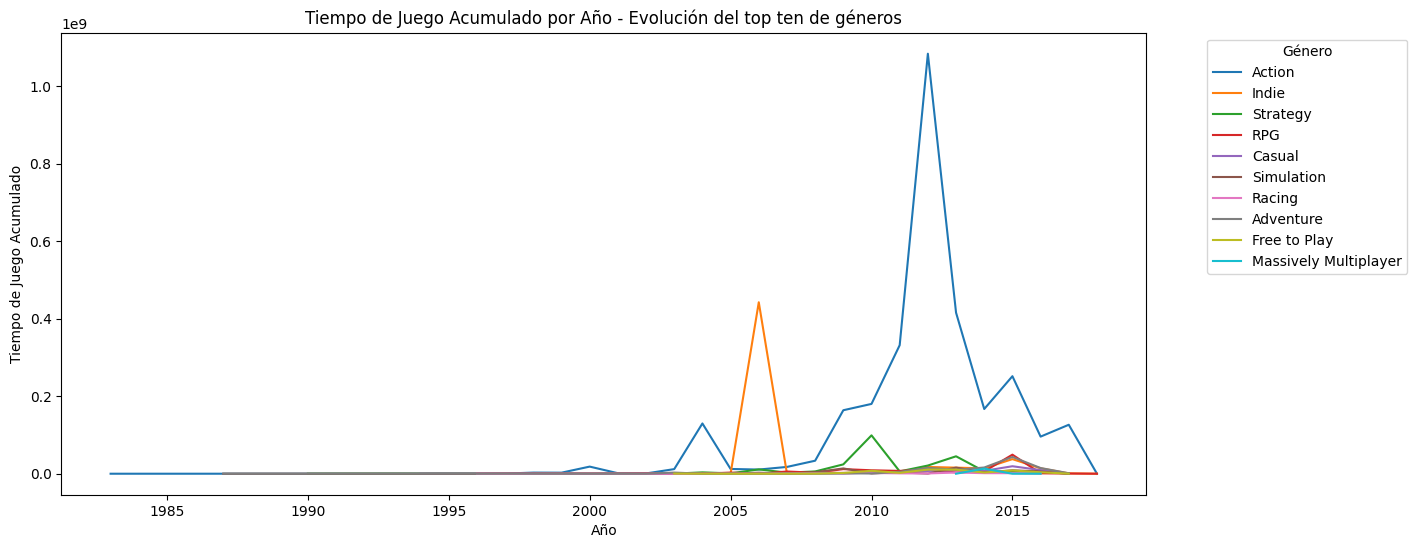

In [29]:
genres_topten_list = genres_topten['genres'].unique()
df_eda_filtered = df_eda[df_eda['genres'].isin(genres_topten_list)]

plt.figure(figsize=(14, 6))
sns.lineplot(x='year', y='playtime_forever', hue='genres', data=df_eda_filtered, estimator=sum, errorbar=None)

plt.xlabel('Año')
plt.ylabel('Tiempo de Juego Acumulado')
plt.title('Tiempo de Juego Acumulado por Año - Evolución del top ten de géneros')

plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

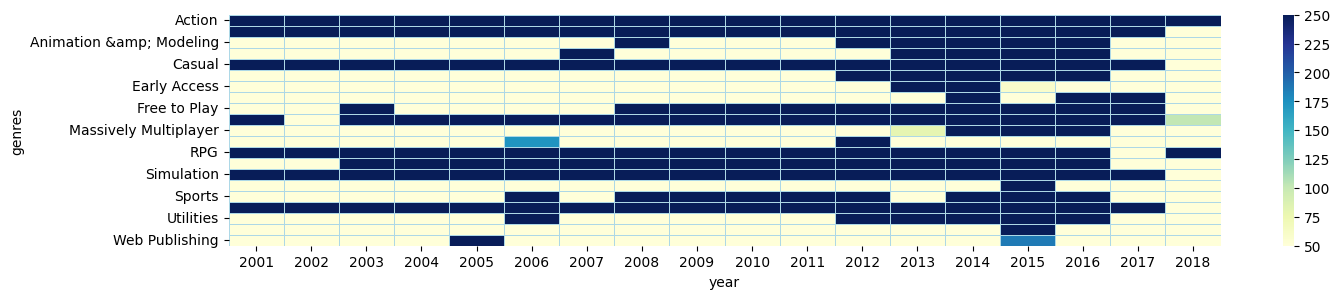

In [30]:
genre_heat = df_eda[df_eda['year'] > 2000].pivot_table(index='genres', 
                                                        columns='year', 
                                                        values='playtime_forever', 
                                                        aggfunc='sum'
                                                        ).fillna(0)
fig, ax = plt.subplots(1,1, figsize=(16, 3))

sns.heatmap(genre_heat, cmap="YlGnBu", linecolor='lightblue', linewidths=0.5, ax=ax, vmin=50, vmax=250)
plt.show()

EDA